## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
merged_df = pd.merge(mouse_df, study_df, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouseCount = merged_df["Mouse ID"].nunique()
mouseCount

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["DupeMice"] = merged_df.duplicated(["Mouse ID", "Timepoint"])

dupe_Id = merged_df.loc[merged_df["DupeMice"] == True, "Mouse ID"].drop_duplicates()
dupe_Id
duplicateID = dupe_Id.iloc[0]
duplicateID

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df = merged_df.loc[merged_df["Mouse ID"] == duplicateID]
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,DupeMice
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.loc[merged_df["Mouse ID"] != duplicateID]
merged_df = merged_df.drop(["DupeMice"], axis=1)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mouseCount = merged_df["Mouse ID"].nunique()
mouseCount

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
meanTV = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medTV = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varTV = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdTV = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semTV = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summaryMerged_df = {"Mean": round(meanTV,2), "Median": round(medTV,2),
                    "Variance": round(varTV,2), "Std Dev": round(stdTV,2),
                    "SEM": round(semTV,2)}
summaryMerged_df = pd.DataFrame(summaryMerged_df)
summaryMerged_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

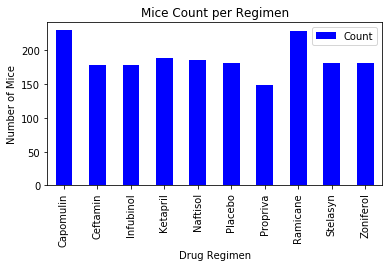

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
miceCountReg_df = merged_df.groupby("Drug Regimen").count()
miceCountReg_df = miceCountReg_df["Mouse ID"]
miceCountReg_df = pd.DataFrame(miceCountReg_df)
miceCountReg_df = miceCountReg_df.rename(columns = {"Mouse ID" : "Count"})
miceCtPandasBar = miceCountReg_df.plot(kind="bar", color = 'b', figsize=(6,3))
miceCtPandasBar.set_title("Mice Count per Regimen")
miceCtPandasBar.set_xlabel("Drug Regimen")
miceCtPandasBar.set_ylabel("Number of Mice")


<Figure size 2160x720 with 0 Axes>

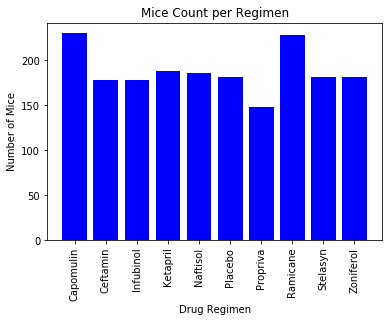

<Figure size 2160x720 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(miceCountReg_df.index.values, miceCountReg_df["Count"], color='b', align="center", label = "Count" )
plt.title("Mice Count per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=90)
plt.figure(figsize=(30,10))


Text(0.5, 1.0, 'Mice Gender')

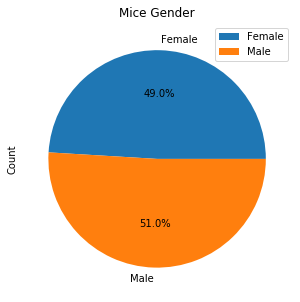

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = merged_df.groupby("Sex").count()
gender_df = pd.DataFrame(gender_df)
gender_df = gender_df.rename(columns = {"Mouse ID" : "Count"})
miceCtPandasPie = gender_df.plot.pie(y="Count",autopct="%1.1f%%", figsize=(5,5))
miceCtPandasPie.set_title("Mice Gender")

<Figure size 1440x1440 with 0 Axes>

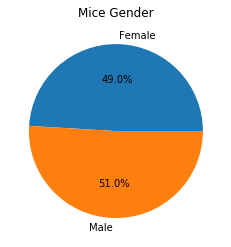

<Figure size 1440x1440 with 0 Axes>

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_df.index.values
plt.pie(gender_df["Count"],  autopct="%1.1f%%", labels = genders, startangle=0,)
plt.title("Mice Gender")
plt.figure(figsize=(20,20))


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specificDrug_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | 
                            (merged_df["Drug Regimen"] == "Ramicane") |
                            (merged_df["Drug Regimen"] == "Infubinol") |
                            (merged_df["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
maxTime_df = specificDrug_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalTumorSize_df = pd.merge(left=maxTime_df, right=specificDrug_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]], how='left', on=["Mouse ID","Timepoint"])
finalTumorSize_df = finalTumorSize_df.rename(columns={'Timepoint': 'Final Timepoint', 'Tumor Volume (mm3)': 'Final Tumor Vol(mm3)'})
finalTumorSize_df 

,Mouse ID,Final Timepoint,Drug Regimen,Final Tumor Vol(mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = pd.Series(finalTumorSize_df["Drug Regimen"].drop_duplicates())
treatments
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinolTumorVol = finalTumorSize_df.loc[finalTumorSize_df["Drug Regimen"] == "Infubinol"]
ceftaminTumorVol = finalTumorSize_df.loc[finalTumorSize_df["Drug Regimen"] == "Ceftamin"]
ramicaneTumorVol = finalTumorSize_df.loc[finalTumorSize_df["Drug Regimen"] == "Ramicane"]
capomulinTumorVol = finalTumorSize_df.loc[finalTumorSize_df["Drug Regimen"] == "Capomulin"]

infubinolQuart = infubinolTumorVol["Final Tumor Vol(mm3)"].quantile([.25,.5,.75])
ceftaminQuart = ceftaminTumorVol["Final Tumor Vol(mm3)"].quantile([.25,.5,.75])
ramicaneQuart = ramicaneTumorVol["Final Tumor Vol(mm3)"].quantile([.25,.5,.75])
capomulinQuart = capomulinTumorVol["Final Tumor Vol(mm3)"].quantile([.25,.5,.75])

infubinolIQR = infubinolQuart[0.75] - infubinolQuart[0.25]
ceftaminIQR = ceftaminQuart[0.75] - ceftaminQuart[0.25]
ramicaneIQR = ramicaneQuart[0.75] - ramicaneQuart[0.25]
capomulinIQR = capomulinQuart[0.75] - capomulinQuart[0.25]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
infubinolLB =  infubinolQuart[0.25] - (1.5*infubinolIQR)
infubinolUB = infubinolQuart[0.75] + (1.5*infubinolIQR)
infubinolOutliers = infubinolTumorVol.loc[(infubinolTumorVol["Final Tumor Vol(mm3)"]  > infubinolUB) | 
                                          (infubinolTumorVol["Final Tumor Vol(mm3)"]  < infubinolLB)]

ceftaminLB =  ceftaminQuart[0.25] - (1.5*ceftaminIQR)
ceftaminUB = ceftaminQuart[0.75] + (1.5*ceftaminIQR)
ceftaminOutliers = ceftaminTumorVol.loc[(ceftaminTumorVol["Final Tumor Vol(mm3)"]  > ceftaminUB) | 
                                          (ceftaminTumorVol["Final Tumor Vol(mm3)"]  < ceftaminLB)]

ramicaneLB =  ramicaneQuart[0.25] - (1.5*ramicaneIQR)
ramicaneUB = ramicaneQuart[0.75] + (1.5*ramicaneIQR)
ramicaneOutliers = ramicaneTumorVol.loc[(ramicaneTumorVol["Final Tumor Vol(mm3)"]  > ramicaneUB) | 
                                          (ramicaneTumorVol["Final Tumor Vol(mm3)"]  < ramicaneLB)]

capomulinLB =  capomulinQuart[0.25] - (1.5*capomulinIQR)
capomulinUB = capomulinQuart[0.75] + (1.5*capomulinIQR)
capomulinOutliers = capomulinTumorVol.loc[(capomulinTumorVol["Final Tumor Vol(mm3)"]  > capomulinUB) | 
                                          (capomulinTumorVol["Final Tumor Vol(mm3)"]  < capomulinLB)]

alloutliers = infubinolOutliers.append(ceftaminOutliers)
alloutliers = alloutliers.append(ramicaneOutliers)
alloutliers = alloutliers.append(capomulinOutliers)
alloutliers

,Mouse ID,Final Timepoint,Drug Regimen,Final Tumor Vol(mm3)
15,c326,5,Infubinol,36.321346


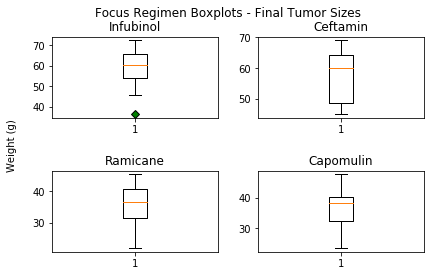

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
fig, axs = plt.subplots(2, 2)
fig.suptitle('Focus Regimen Boxplots - Final Tumor Sizes')
axs[0, 0].boxplot(infubinolTumorVol["Final Tumor Vol(mm3)"],flierprops=green_diamond)
axs[0, 0].set_title('Infubinol')
axs[0, 1].boxplot(ceftaminTumorVol["Final Tumor Vol(mm3)"],flierprops=green_diamond)
axs[0, 1].set_title('Ceftamin')
axs[1, 0].boxplot(ramicaneTumorVol["Final Tumor Vol(mm3)"],flierprops=green_diamond)
axs[1, 0].set_title('Ramicane')
axs[1, 1].boxplot(capomulinTumorVol["Final Tumor Vol(mm3)"],flierprops=green_diamond)
axs[1, 1].set_title('Capomulin')
fig.text(0.0, .5, 'Weight (g)', ha='center', va='center', rotation='vertical')


fig.tight_layout(pad=2.0)
fig.figsize=(20,20)

## Line and Scatter Plots

Text(0.5, 1.0, 'Avg Tumor Volume Over Time - Capomulin Regimen')

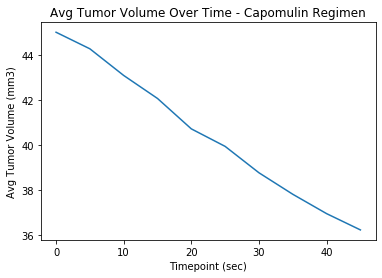

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulinTumorVsTime_df = pd.DataFrame(capomulin_df.groupby('Timepoint')["Tumor Volume (mm3)"].mean())


plt.plot(capomulinTumorVsTime_df.index, capomulinTumorVsTime_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (sec)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Volume Over Time - Capomulin Regimen")

Text(0.5, 1.0, 'Avg Tumor Volume vs Weight - Capomulin Regimen')

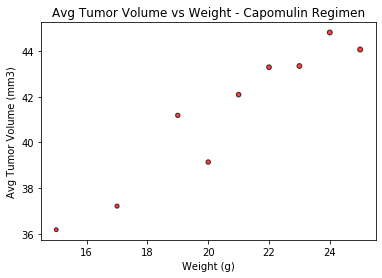

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinWeightVsTumor_df = pd.DataFrame(capomulin_df.groupby('Weight (g)')["Tumor Volume (mm3)"].mean())
plt.scatter(capomulinWeightVsTumor_df.index, capomulinWeightVsTumor_df["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            s=capomulinWeightVsTumor_df.index, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Weight - Capomulin Regimen")

## Correlation and Regression

The correlation between mouse weight and tumor size under the Capomulin regimen is: 0.95
The regression line equation is: y = 0.89x + 22.76


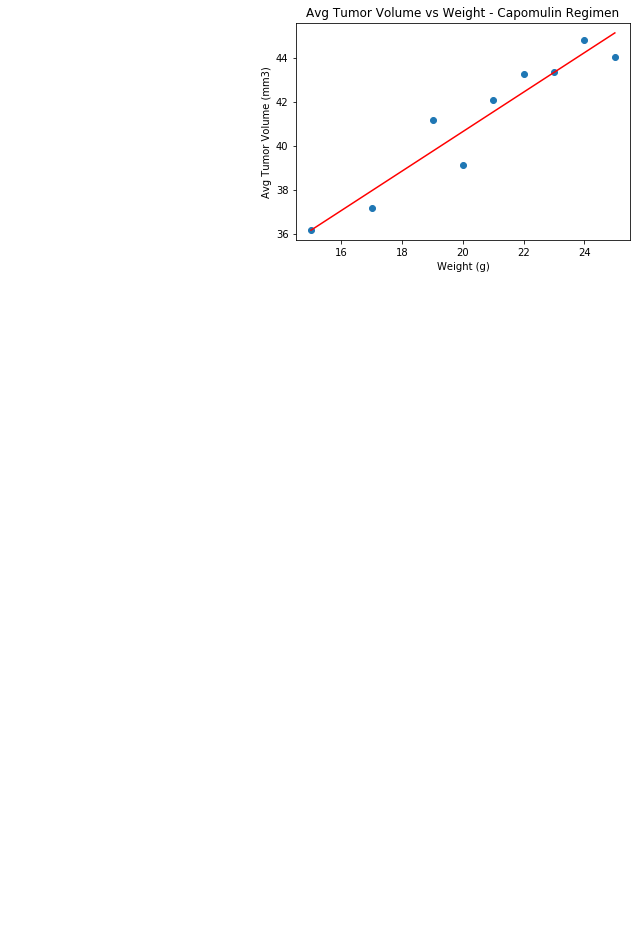

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulinWeightVsTumor_df.index
volume = capomulinWeightVsTumor_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,volume)
correlation = round(correlation[0],2)


x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=10,color="red")
plt.figsize=(5,5)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Avg Tumor Volume vs Weight - Capomulin Regimen")

print(f"The correlation between mouse weight and tumor size under the Capomulin regimen is: {correlation}")
print(f"The regression line equation is: {line_eq}")


## Observations:


In [ ]:
#1)  There is a clear downward trend in the size of the tumor over time for mice treated with the Capomulin regimen.  This would indicate that Capomulin is effective in reducing the overall volume of the tumor in the sample mice tested.
#2)  There is a strong positive correlation (.95 correlation coefficient) between mouse weight and average tumor volume for mice treated with the Capomulin regimen.  Larger mice tend to have larger tumors while smaller mice have smaller tumors. 
#3)  Accoridng to the boxplots, of the four focus regimens, Capomulin and Ramicane have much lower final tumor sizes on average relative to the other two focus drugs possibly indicating their higher level of efficacy in treating the tumors.

